In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
evaluation = execute_simulation(start_time=0, mtd_interval=200, scheme='single',custom_strategies=OSDiversity, total_nodes=100)

Adversary: Start SCAN_HOST at 0.0s.
MTD: OSDiversity triggered 0.0s
MTD: OSDiversity deployed in the network at 0.0s.
Adversary: Processed SCAN_HOST at 5.0s.
Adversary: Start ENUM_HOST at 5.0s.
Adversary: Processed ENUM_HOST at 10.0s.
Adversary: Start SCAN_PORT at 10.0s.
Adversary: Processed SCAN_PORT at 35.0s.
Adversary: Start EXPLOIT_VULN 60c324e4-dc0a-4251-903f-862db17eb641 on host 0 at 35.0s.
Adversary: Processed EXPLOIT_VULN 60c324e4-dc0a-4251-903f-862db17eb641 on host 0 at 38.4s.
Adversary: Start EXPLOIT_VULN 14dfd223-9628-4c07-b632-af47e180430c on host 0 at 38.4s.
Adversary: Processed EXPLOIT_VULN 14dfd223-9628-4c07-b632-af47e180430c on host 0 at 61.4s.
Adversary: Start EXPLOIT_VULN e3180cdf-d9ff-4a3a-a5ca-358fb6d9c887 on host 0 at 61.4s.
Adversary: Processed EXPLOIT_VULN e3180cdf-d9ff-4a3a-a5ca-358fb6d9c887 on host 0 at 70.7s.
OS DEPENDENT VULNERABILITY EXPLOITED!
Adversary: Start EXPLOIT_VULN 3967d07c-7dc4-4c8e-9d54-0cc3e838cd1f on host 0 at 70.7s.
Adversary: Processed EXPLOIT

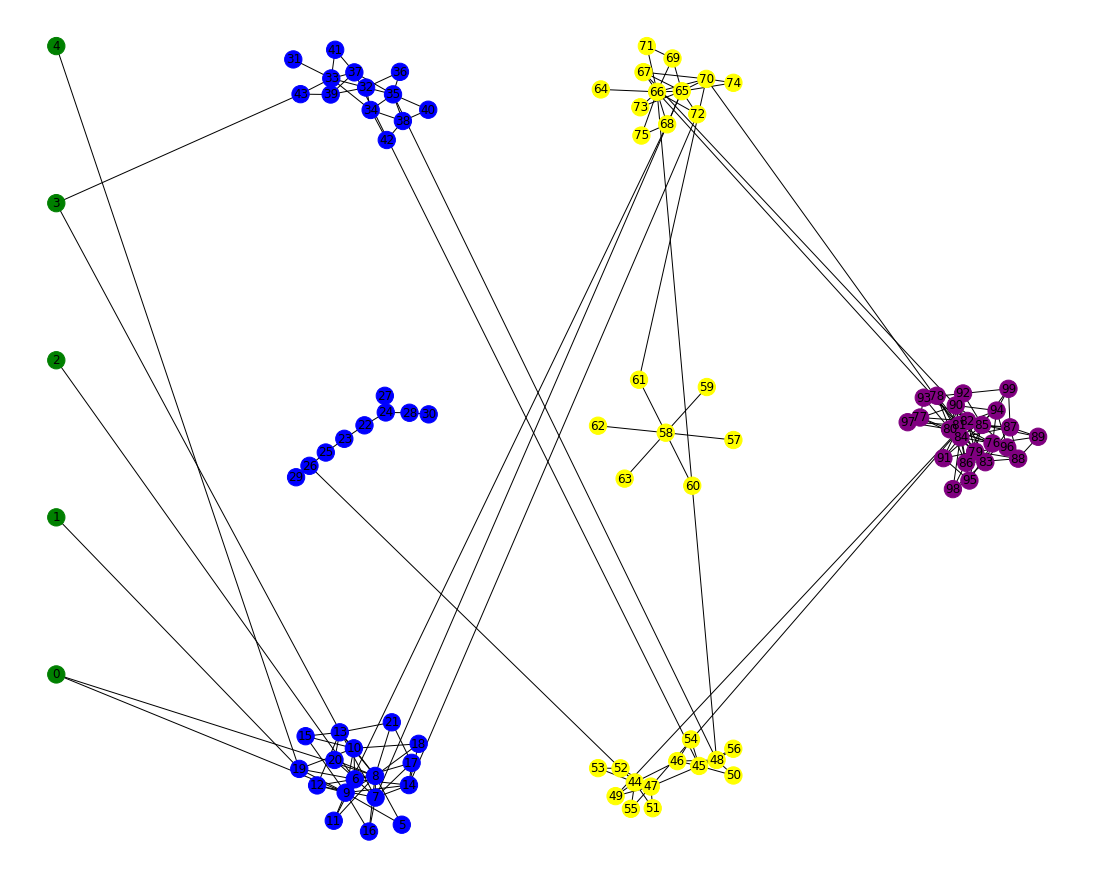

In [4]:
evaluation.get_network().draw()
plt.show()

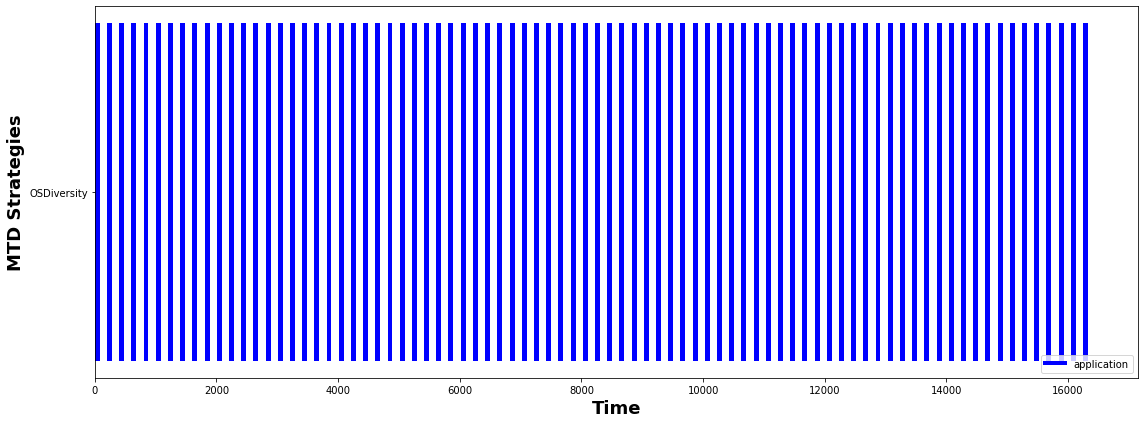

In [5]:
evaluation.visualise_mtd_operation()

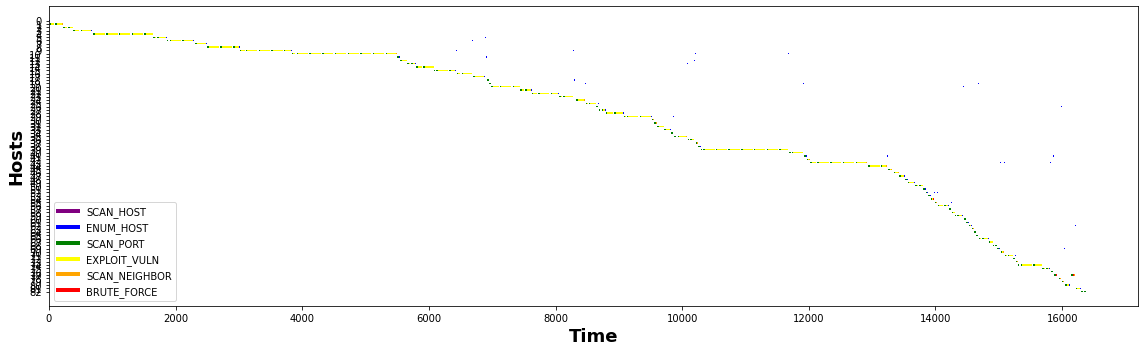

In [6]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  81


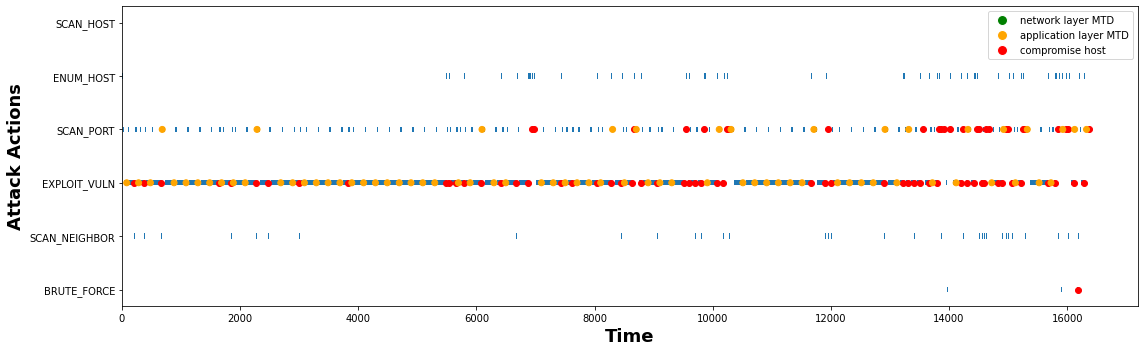

In [7]:
evaluation.visualise_attack_operation()

In [8]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
18,EXPLOIT_VULN,202.410563,212.045002,9.634439,0,c151c293-2c49-4717-86e8-3ba49df03efa,0,c151c293-2c49-4717-86e8-3ba49df03efa,1,13,0,"[Kelcey, Martynne, Nicola, Helga, Agnola]",None,None,yellow,1
28,EXPLOIT_VULN,364.407299,376.828645,12.421346,8,c473032e-24b1-46df-b1bb-1161c14337b4,8,c473032e-24b1-46df-b1bb-1161c14337b4,1,18,1,"[Fiona, Seana, Paulette, Carrie, Ardella]",None,None,yellow,2
51,EXPLOIT_VULN,650.616750,666.042309,15.425559,11,098b3b04-3e8e-47e7-ac4f-fda9d562ce37,11,098b3b04-3e8e-47e7-ac4f-fda9d562ce37,1,36,2,"[Theo, Patrizia, Sile, Coriss]",None,None,yellow,3
112,EXPLOIT_VULN,1612.030543,1635.829440,23.798896,6,73be2039-e87e-47ed-8279-c1d220315d48,6,73be2039-e87e-47ed-8279-c1d220315d48,1,85,3,"[Diann, Cassandry, Kial]",None,None,yellow,4
128,EXPLOIT_VULN,1829.500639,1850.052262,20.551624,14,3b9ff2e3-97e2-475d-9e06-1ad11b7c2253,14,3b9ff2e3-97e2-475d-9e06-1ad11b7c2253,1,96,4,"[Ailis, Kerrie, Consuela, Sheri, Auroora]",None,None,yellow,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,SCAN_PORT,15996.294182,16021.294182,25.000000,97,b20e39cf-3dd4-4696-9f04-9ae3ccb65ae8,97,b20e39cf-3dd4-4696-9f04-9ae3ccb65ae8,1,704,76,[],None,None,green,79
1164,EXPLOIT_VULN,16081.066803,16107.374792,26.307990,93,3691f980-b593-4a19-a11f-110fd1b5e5e9,93,3691f980-b593-4a19-a11f-110fd1b5e5e9,1,706,77,[],None,None,yellow,80
1169,BRUTE_FORCE,16171.073080,16191.073080,20.000000,77,c2fe6360-7c32-4b72-8ad3-8b13ca3d5435,77,c2fe6360-7c32-4b72-8ad3-8b13ca3d5435,2,707,78,[],None,None,red,77
1176,EXPLOIT_VULN,16260.464326,16282.963298,22.498972,89,5efa0d04-af52-43f2-944c-dcf044c2e330,89,5efa0d04-af52-43f2-944c-dcf044c2e330,1,708,79,[],None,None,yellow,81


In [9]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
499,SCAN_PORT,6917.203315,6942.203315,25.0,68,d7122587-4de5-4747-a0dd-e389300ea937,68,d7122587-4de5-4747-a0dd-e389300ea937,1,368,17,"[Lilli, Vivian, Nani]",None,None,green,18
502,SCAN_PORT,6952.203315,6977.203315,25.0,66,e5320da1-0fba-4f62-b84d-1a3ad76f3963,66,e5320da1-0fba-4f62-b84d-1a3ad76f3963,1,368,18,[],None,None,green,19
618,SCAN_PORT,8641.639662,8666.639662,25.0,67,7319dd03-a9f5-460c-9594-97bd69cda7c9,67,7319dd03-a9f5-460c-9594-97bd69cda7c9,1,441,25,"[Nicoli, Wanids]",None,None,green,26
666,SCAN_PORT,9517.486243,9542.486243,25.0,57,1d5373df-b680-4376-90d8-a751dbe7b831,57,1d5373df-b680-4376-90d8-a751dbe7b831,1,468,29,"[Sofia, Bibbie, Kitti]",None,None,green,30
697,SCAN_PORT,9823.104596,9848.104596,25.0,59,daff2b3e-9cf8-4fe3-9b30-5202caebb6f2,59,daff2b3e-9cf8-4fe3-9b30-5202caebb6f2,1,483,33,[],None,None,green,34
728,SCAN_PORT,10214.434858,10239.434858,25.0,69,d0c7b385-9f80-47e9-8921-b17617f687fd,69,d0c7b385-9f80-47e9-8921-b17617f687fd,1,491,36,[],None,None,green,37
732,SCAN_PORT,10254.434858,10279.434858,25.0,71,fd614055-da68-4f0f-a9b4-1744a3203f4f,71,fd614055-da68-4f0f-a9b4-1744a3203f4f,1,491,37,[],None,None,green,38
846,SCAN_PORT,11930.439466,11955.439466,25.0,47,6d5b014e-e34c-4eda-8099-44f7a0e53ec0,47,6d5b014e-e34c-4eda-8099-44f7a0e53ec0,1,575,40,[],None,None,green,41
969,SCAN_PORT,13526.409072,13551.409072,25.0,35,9b645301-4a31-4a09-aaa9-5bc7275f380f,35,9b645301-4a31-4a09-aaa9-5bc7275f380f,1,657,47,[],None,None,green,48
989,SCAN_PORT,13807.889146,13832.889146,25.0,41,8f9a5bf9-db2d-4663-8383-a739013b35cf,41,8f9a5bf9-db2d-4663-8383-a739013b35cf,1,665,50,[],None,None,green,51


In [10]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
18,EXPLOIT_VULN,202.410563,212.045002,9.634439,0,c151c293-2c49-4717-86e8-3ba49df03efa,0,c151c293-2c49-4717-86e8-3ba49df03efa,1,13,0,"[Kelcey, Martynne, Nicola, Helga, Agnola]",None,None,yellow,1
28,EXPLOIT_VULN,364.407299,376.828645,12.421346,8,c473032e-24b1-46df-b1bb-1161c14337b4,8,c473032e-24b1-46df-b1bb-1161c14337b4,1,18,1,"[Fiona, Seana, Paulette, Carrie, Ardella]",None,None,yellow,2
51,EXPLOIT_VULN,650.616750,666.042309,15.425559,11,098b3b04-3e8e-47e7-ac4f-fda9d562ce37,11,098b3b04-3e8e-47e7-ac4f-fda9d562ce37,1,36,2,"[Theo, Patrizia, Sile, Coriss]",None,None,yellow,3
112,EXPLOIT_VULN,1612.030543,1635.829440,23.798896,6,73be2039-e87e-47ed-8279-c1d220315d48,6,73be2039-e87e-47ed-8279-c1d220315d48,1,85,3,"[Diann, Cassandry, Kial]",None,None,yellow,4
128,EXPLOIT_VULN,1829.500639,1850.052262,20.551624,14,3b9ff2e3-97e2-475d-9e06-1ad11b7c2253,14,3b9ff2e3-97e2-475d-9e06-1ad11b7c2253,1,96,4,"[Ailis, Kerrie, Consuela, Sheri, Auroora]",None,None,yellow,5
160,EXPLOIT_VULN,2259.699809,2274.529402,14.829593,9,b44f97e1-0e7f-4640-b810-886a3cfd859e,9,b44f97e1-0e7f-4640-b810-886a3cfd859e,1,121,5,"[Cody, Othelia, Tamra]",None,None,yellow,6
174,EXPLOIT_VULN,2476.541590,2480.294451,3.752860,16,365e9345-0dcb-4d83-93e6-24df486f107e,16,365e9345-0dcb-4d83-93e6-24df486f107e,1,131,6,"[Charity, Lisabeth]",None,None,yellow,7
206,EXPLOIT_VULN,2982.102193,3001.813310,19.711117,5,191fdb50-4cfc-44af-afc0-d20a3d7c9151,5,191fdb50-4cfc-44af-afc0-d20a3d7c9151,1,155,7,"[Fallon, Gayla, Dita]",None,None,yellow,8
269,EXPLOIT_VULN,3818.199629,3820.678672,2.479043,7,4da93249-88f1-4b37-897a-3a2a510e5d10,7,4da93249-88f1-4b37-897a-3a2a510e5d10,1,207,8,"[Flore, Barby, Mala]",None,None,yellow,9
376,EXPLOIT_VULN,5476.960892,5485.208840,8.247947,65,ac668ef2-27b1-4eed-bf6c-690254ad2241,65,ac668ef2-27b1-4eed-bf6c-690254ad2241,1,295,9,"[Revkah, Talia, Elianora, Nisse, Sharai]",None,None,yellow,10


In [11]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
1169,BRUTE_FORCE,16171.07308,16191.07308,20.0,77,c2fe6360-7c32-4b72-8ad3-8b13ca3d5435,77,c2fe6360-7c32-4b72-8ad3-8b13ca3d5435,2,707,78,[],None,None,red,77


In [12]:
evaluation.evaluation_result_by_compromise_checkpoint()

[{'time_to_compromise': 4881.322877748827,
  'attack_success_rate': 0.2702702702702703,
  'host_compromise_ratio': 0.1,
  'mtd_execution_frequency': 0.0050223404925775665},
 {'time_to_compromise': 6611.21535960856,
  'attack_success_rate': 0.36363636363636365,
  'host_compromise_ratio': 0.2,
  'mtd_execution_frequency': 0.0050223404925775665},
 {'time_to_compromise': 8261.51104757555,
  'attack_success_rate': 0.40540540540540543,
  'host_compromise_ratio': 0.3,
  'mtd_execution_frequency': 0.0050223404925775665},
 {'time_to_compromise': 10210.899129517864,
  'attack_success_rate': 0.425531914893617,
  'host_compromise_ratio': 0.4,
  'mtd_execution_frequency': 0.0050223404925775665},
 {'time_to_compromise': 11779.993552243668,
  'attack_success_rate': 0.44642857142857145,
  'host_compromise_ratio': 0.5,
  'mtd_execution_frequency': 0.0050223404925775665},
 {'time_to_compromise': 12300.977745915105,
  'attack_success_rate': 0.48,
  'host_compromise_ratio': 0.6,
  'mtd_execution_frequency